In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
from state.map import X_MAX, Y_MAX, ARENA_WALLS 

In [318]:
from math import pi

In [13]:
import state.particle_filtering

In [249]:
# Generate empty space with right dimensions

def gen_lines():
    lines = []
    for wall in ARENA_WALLS:
        start = wall[0]
        delta = wall[1]

        end = np.add(start, delta)

        line_xs = []
        line_ys = []

        line_xs.append(start[0])
        line_xs.append(end[0])
        line_ys.append(start[1])
        line_ys.append(end[1])

        lines.append(Line2D(line_xs, line_ys, linewidth=2))
        
    return lines 

def plot(particles):
    dpi = 80
    width = X_MAX / dpi;
    height = Y_MAX / dpi;
    figure = plt.figure(figsize=(width,height))

    ax = figure.add_subplot(1,1,1)

    ax.set_ylim(top=Y_MAX, bottom=0)
    ax.set_xlim(right=X_MAX, left=0)

    lines = gen_lines()
    for line in lines:
        ax.add_line(line)
    
    xs = []
    ys = []
    os = []
    for robot in particles.data:
        xs.append(robot.x)
        ys.append(robot.y)
        os.append(robot.orientation)

    ax.quiver(xs, ys, np.sin(os), np.cos(os), pivot='mid')
    
    x, y, o = particles.get_position_by_weight()
    ax.plot(x, y, 'ro')

    return figure

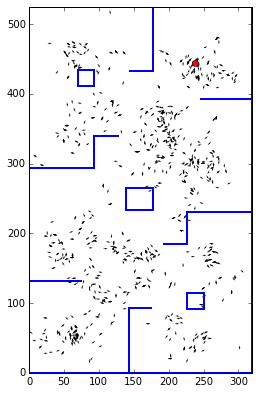

In [346]:
figure = plot(particles)
plt.show(figure)

In [319]:
reload(state.particle_filtering)
particles = state.particle_filtering.Particles(n=1000)
robot = Robot()
robot.set(60, 50, 0)

In [ ]:
for i in xrange(3):
    factor = 3.0
    robot.rotate(pi/factor)
    particles.rotate(pi/factor)
    particles.sense(robot.measurement_prediction())
    distance = 15.0
    robot.forward(distance)
    particles.forward(distance)
    particles.sense(robot.measurement_prediction())

In [345]:
particles.resample()